In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

In [5]:
!pip install kaggle
!mkdir .kaggle
!mv kaggle.json .kaggle
!mv .kaggle /root/

!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.10MB/s]


In [6]:
import zipfile
with zipfile.ZipFile('/content/customer-segmentation-tutorial-in-python.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

# Data Analysis

In [7]:
df_ci = pd.read_csv('Mall_Customers.csv')
df_ci.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df = df_ci.drop('CustomerID', axis=1)

In [9]:
print(f'There {df.shape[0]} patients and {df.shape[1]} features in this dataset')

There 200 patients and 4 features in this dataset


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [11]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


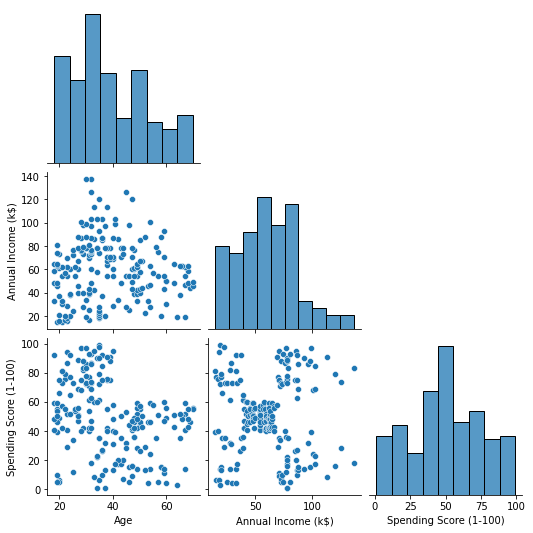

In [12]:
sns.pairplot(df, corner=True)

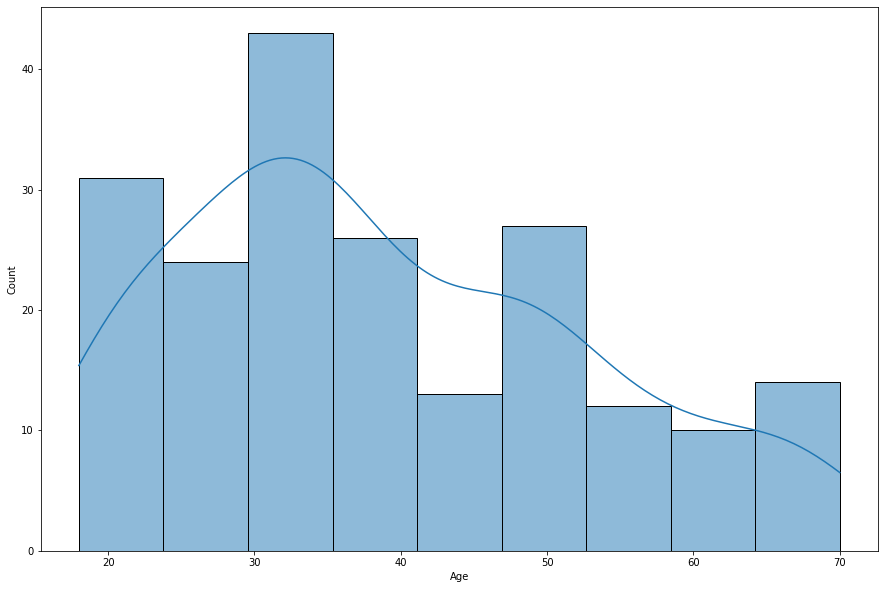

In [13]:
plt.subplots(figsize=(15,10))
sns.histplot(x=df["Age"], kde=True)

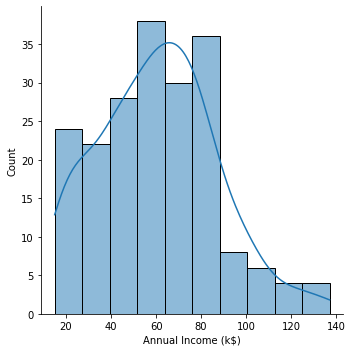

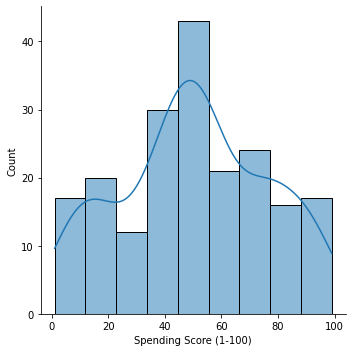

In [14]:
sns.displot(df['Annual Income (k$)'], kde=True)
sns.displot(df['Spending Score (1-100)'], kde=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


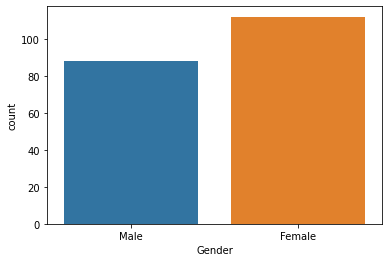

In [15]:
sns.countplot(df['Gender'])

In [16]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


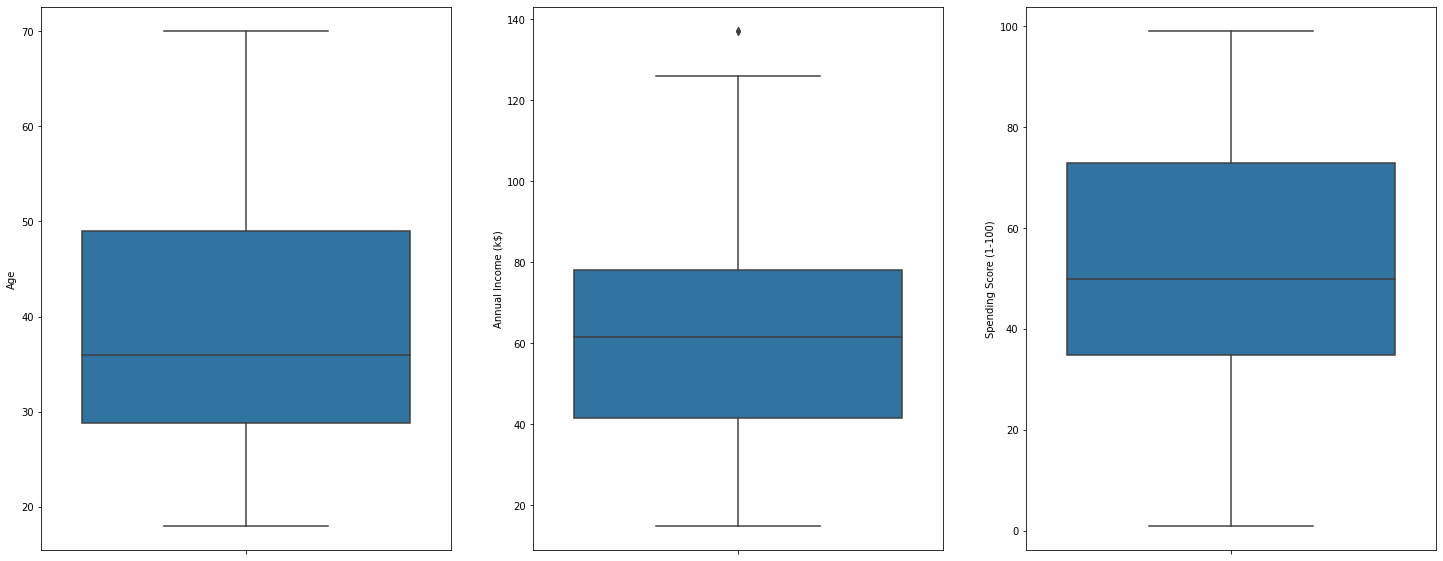

In [17]:
plt.figure(figsize=(25,10))

plt.subplot(131)
sns.boxplot(y=df['Age'])

plt.subplot(132)
sns.boxplot(y=df['Annual Income (k$)'])

plt.subplot(133)
sns.boxplot(y=df['Spending Score (1-100)'])

In [18]:
df_new = pd.get_dummies(df, columns = ['Gender'])
df_new.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [19]:
X1 = df[['Annual Income (k$)', 'Age']]
X1_scaled = StandardScaler().fit_transform(X1)
X1_scaled = pd.DataFrame(X1_scaled, columns=['P1', 'P2'])

In [20]:
X2 = df[['Spending Score (1-100)', 'Age']]
X2_scaled = StandardScaler().fit_transform(X2)
X2_scaled = pd.DataFrame(X2_scaled, columns=['P1', 'P2'])

# K Means

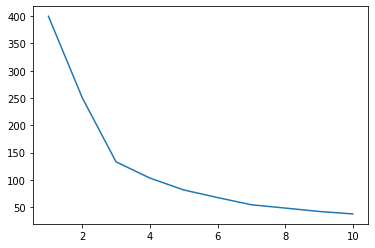

In [21]:
wcss_list = []
for i in range(1, 11):  
  k_means = KMeans(init = "k-means++", n_clusters = i, n_init = 12, random_state=10)
  k_means.fit(X1_scaled)
  wcss_list.append(k_means.inertia_) 
plt.plot(range(1, 11), wcss_list)  

In [22]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12, random_state=10)
k_means.fit(X1_scaled)
clusters = k_means.predict(X1_scaled)

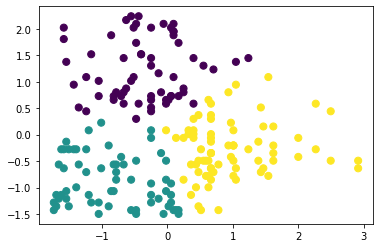

In [23]:
plt.scatter(X1_scaled['P1'],X1_scaled['P2'], c=clusters,s=50)

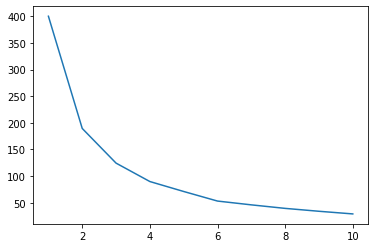

In [24]:
wcss_list = []
for i in range(1, 11):  
  k_means = KMeans(init = "k-means++", n_clusters = i, n_init = 12, random_state=10)
  k_means.fit(X2_scaled)
  wcss_list.append(k_means.inertia_) 
plt.plot(range(1, 11), wcss_list)  

In [25]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12, random_state=10)
k_means.fit(X2_scaled)
clusters = k_means.predict(X2_scaled)

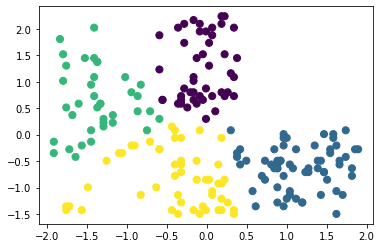

In [26]:
plt.scatter(X2_scaled['P1'],X2_scaled['P2'], c=clusters,s=50)

# PCA

In [27]:
X_scaled = StandardScaler().fit_transform(df_new)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_scaled)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [28]:
X_principal

,P1,P2
0,1.321908,-0.782594
1,1.150019,-1.816813
2,-1.320033,0.607360
3,-1.613849,-1.159959
4,-1.376544,0.234457
...,...,...
195,-1.227359,-0.976973
196,-0.895962,0.877785
197,1.588228,-1.465029
198,1.871134,0.008680


# Agglomerative 

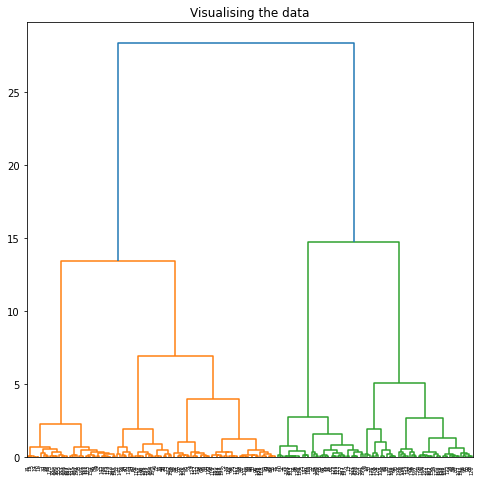

In [29]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

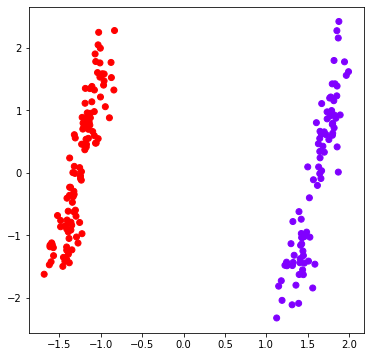

In [30]:
agglom1 = AgglomerativeClustering(n_clusters = 2, linkage = 'average')
agglom1.fit(X_principal)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'],X_principal['P2'],
           c = agglom1.fit_predict(X_principal), cmap ='rainbow')
plt.show()

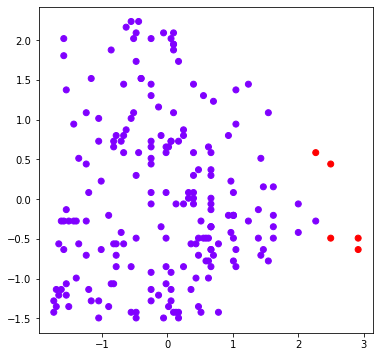

In [31]:
agglom1 = AgglomerativeClustering(n_clusters = 2, linkage = 'average')
agglom1.fit(X1_scaled)
plt.figure(figsize =(6, 6))
plt.scatter(X1_scaled['P1'],X1_scaled['P2'],
           c = agglom1.fit_predict(X1_scaled), cmap ='rainbow')
plt.show()

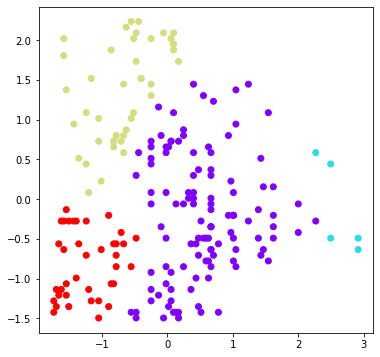

In [32]:
agglom1 = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom1.fit(X1_scaled)
plt.figure(figsize =(6, 6))
plt.scatter(X1_scaled['P1'],X1_scaled['P2'],
           c = agglom1.fit_predict(X1_scaled), cmap ='rainbow')
plt.show()